In [95]:
import pandas as pd
# from sqlalchemy import create_engine
# import urllib
# params = urllib.parse.quote_plus("PWD=posgres")
# engine = create_engine('postgresql://localhost:5432/sql_employee_db' % params)
# connection = engine.connect()
import psycopg2
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    database="sql_employee_db",
    user="postgres",
    password="postgres")

# Query All Records in the the Database
sal = pd.read_sql("SELECT * FROM salaries", conn)
title = pd.read_sql("SELECT * FROM titles", conn)
employees = pd.read_sql("SELECT * FROM employees", conn)

In [96]:
df = sal.merge(employees, on = "emp_no")
df = df.merge(title, left_on = "emp_title", right_on = "title_id")
df.head()

,emp_no,salary,emp_title,birth_date,first_name,last_name,sex,hire_date,title_id,title
0,10001,60117,e0003,9/2/1953,Georgi,Facello,M,1986-06-26,e0003,Senior Engineer
1,10003,40006,e0003,12/3/1959,Parto,Bamford,M,1986-08-28,e0003,Senior Engineer
2,10004,40054,e0003,5/1/1954,Chirstian,Koblick,M,1986-12-01,e0003,Senior Engineer
3,10006,40000,e0003,4/20/1953,Anneke,Preusig,F,1989-06-02,e0003,Senior Engineer
4,10009,60929,e0003,4/19/1952,Sumant,Peac,F,1985-02-18,e0003,Senior Engineer


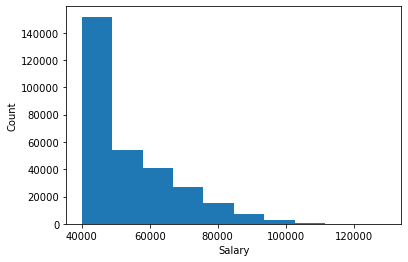

In [97]:
plt.hist(df.salary)
plt.xlabel("Salary")
plt.ylabel("Count");

In [98]:
#mean salaries by job title
dfsal = pd.DataFrame(df.groupby(df.title).mean())["salary"]
dfsal

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

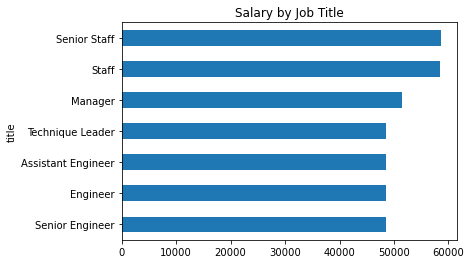

In [99]:
dfsal = dfsal.sort_values()
dfsal.plot.barh(title = "Salary by Job Title");

In [100]:
df[df['emp_no'] == 499942]
# april foolsday is the name

,emp_no,salary,emp_title,birth_date,first_name,last_name,sex,hire_date,title_id,title
299999,499942,40000,e0004,1/10/1963,April,Foolsday,F,1997-02-10,e0004,Technique Leader
